In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
coeff_list = [1, 2.5, 5, 10, 15, 20]
# Load mmd_dict from a file
with open('mmd_dict.pkl', 'rb') as f:
    mmd_dict = pickle.load(f)

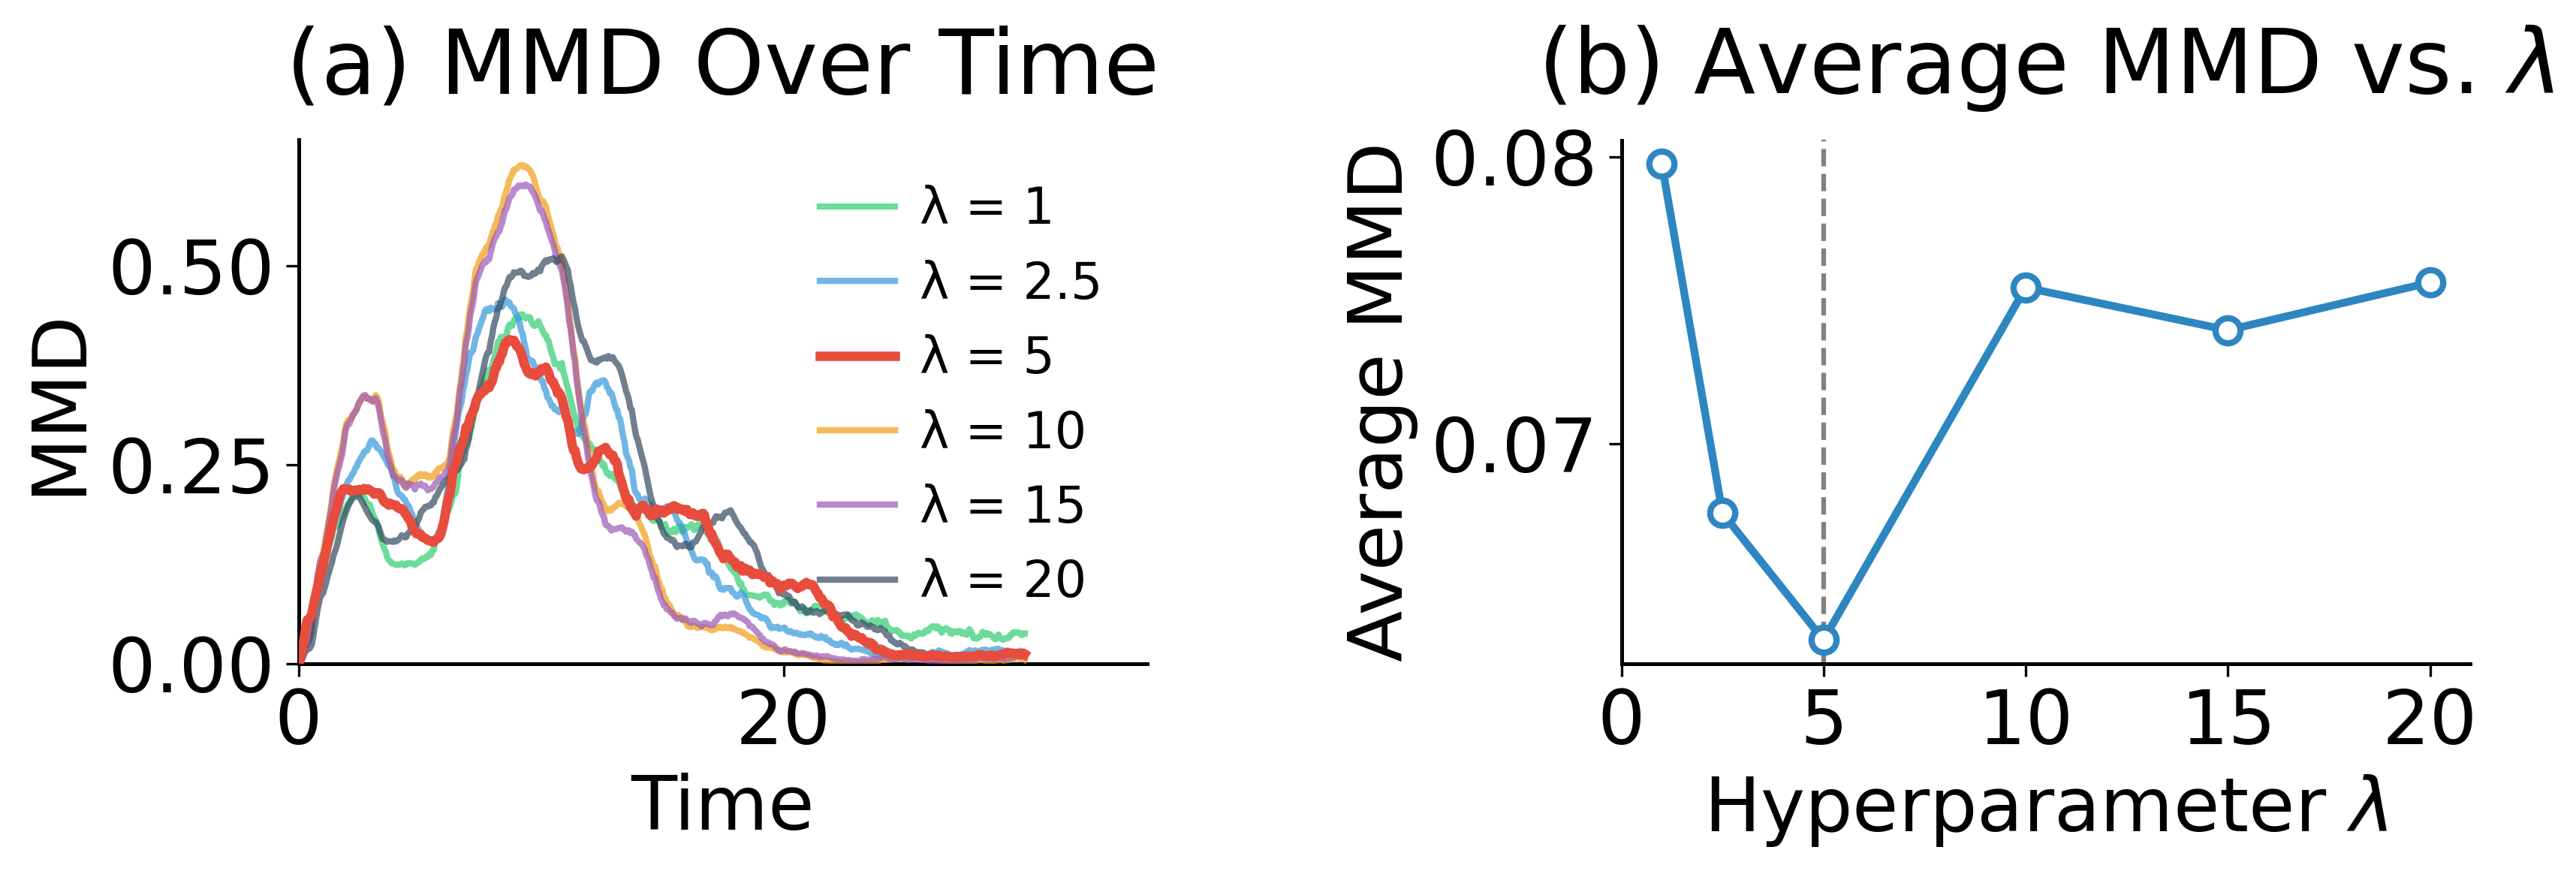

In [3]:
# Additional visualization: Compare temporal MMD across Hyperparameter $\lambda$s
# Set up professional figure style
plt.rcParams.update({
    'font.size': 24,
    'font.family': 'sans-serif',  # Default matplotlib font
    'axes.linewidth': 1.2,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.minor.size': 2,
    'ytick.minor.size': 2,
    'legend.frameon': False,
    'legend.fontsize': 16,
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# Extract temporal MMD values for plotting
coeffs = []
temporal_mmd_values = []

for coeff in coeff_list:
    key = f'coeff_{coeff}_seed_0'  # Using seed 0 since you only have one seed
    if key in mmd_dict:
        coeffs.append(coeff)
        # Average temporal MMD across all test datasets
        avg_temporal_mmd = np.mean([mmd_result['temporal_mmd'] for mmd_result in mmd_dict[key]])
        temporal_mmd_values.append(avg_temporal_mmd)

time_steps = len(mmd_dict[list(mmd_dict.keys())[0]][0]['mmd_per_timestep'])

# Professional color palette
colors = ['#2ECC71', '#3498DB','#E74C3C', '#F39C12', '#9B59B6', '#34495E']

# Subsample timesteps for cleaner visualization
subsample_rate = max(1, time_steps // 500)  # Show at most 500 points
time_indices = np.arange(0, time_steps, subsample_rate) 

for i, coeff in enumerate([1, 2.5, 5, 10, 15, 20]):
    key = f'coeff_{coeff}_seed_0'
    if key in mmd_dict and len(mmd_dict[key]) > 0:
        # Use first test dataset for temporal evolution plot
        mmd_per_timestep = mmd_dict[key][0]['mmd_per_timestep']
        mmd_subsampled = [mmd_per_timestep[j] for j in time_indices]
        
        if coeff == 5:
            linewidth = 3.0
            alpha = 1.0
            zorder = 10
        else:
            linewidth = 2.0
            alpha = 0.7
            zorder = 5
            
        axes[0].plot(time_indices * 0.01, mmd_subsampled, 
                    color=colors[i], 
                    linewidth=linewidth, 
                    label=f'λ = {coeff}', 
                    alpha=alpha,
                    zorder=zorder)

axes[0].set_title('(a) MMD Over Time',  pad=15)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('MMD')
axes[0].set_xlim(0, 35)

# Improve legend positioning and styling
legend = axes[0].legend(loc='upper right', ncol=1, columnspacing=1.0, 
                        handlelength=1.5, handletextpad=0.5)

# Set y-axis to start from 0 for better comparison
axes[0].set_ylim(bottom=0)

axes[1].axvline(x=5, color='gray', linestyle='--', linewidth=1.5)
# Plot Temporal MMD vs Hyperparameter $\lambda$
axes[1].plot(coeffs, temporal_mmd_values, marker='o', color='#2E86C1', 
             linewidth=2.5, markersize=8, markerfacecolor='white', 
             markeredgecolor='#2E86C1', markeredgewidth=2)
axes[1].set_title('(b) Average MMD vs. $\lambda$', pad=15)
axes[1].set_xlabel('Hyperparameter $\lambda$')
axes[1].set_ylabel('Average MMD')
axes[1].set_xlim(0, 21)
axes[1].set_xticks([0, 5, 10, 15, 20])

# Adjust layout with proper spacing
plt.tight_layout(pad=2.0)

# Save figure in high resolution for publication
plt.savefig('temporal_mmd_analysis.png', bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('temporal_mmd_analysis.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()